#Q.2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/AMLDrive/dogs-vs-cats.zip


Archive:  /content/drive/MyDrive/AMLDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


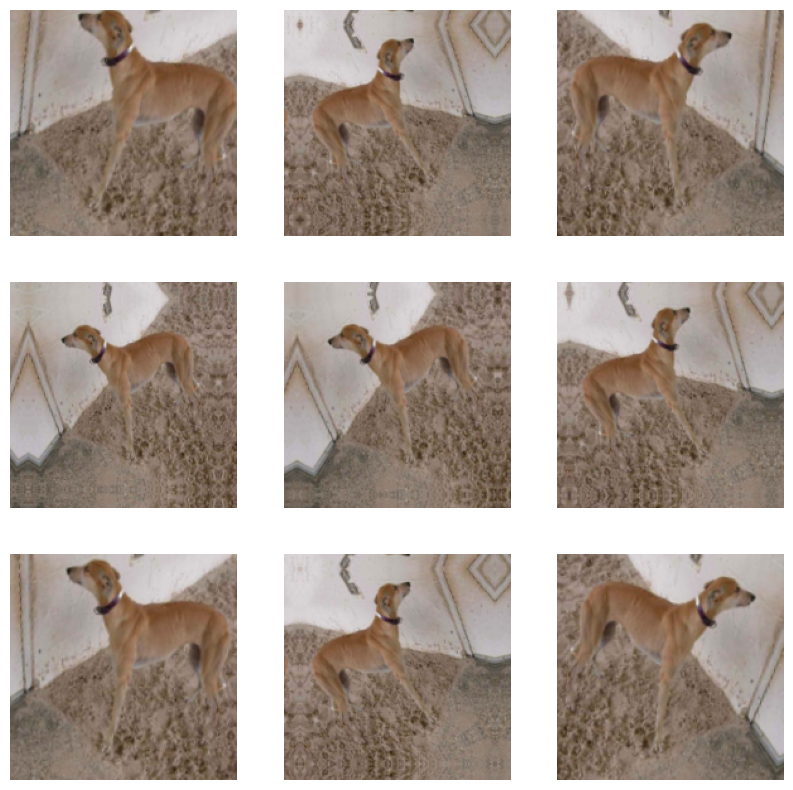

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'train_d' is your training dataset and 'data_augmentation' is defined
plt.figure(figsize=(10, 10))
for images, _ in train_d.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_d,
    epochs=30,
    validation_data=validation_d,
    callbacks=callbacks)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.5128 - loss: 0.6982 - val_accuracy: 0.5000 - val_loss: 0.7003
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.5380 - val_loss: 0.6891
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.5386 - loss: 0.6883 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.5359 - loss: 0.6857 - val_accuracy: 0.5900 - val_loss: 0.6725
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.5744 - loss: 0.6794 - val_accuracy: 0.6400 - val_loss: 0.6494
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.5907 - loss: 0.6663 - val_accuracy: 0.6670 - val_loss: 0.6325
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.6055 - loss: 0.6635 - val_accuracy: 0.6490 - val_loss: 0.6165
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.6440 - loss: 0.6360 - val_accuracy: 0.6810 - v

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 854ms/step - accuracy: 0.8073 - loss: 0.4312
Test accuracy: 0.801


#Conclusion:

The test accuracy has increased to 80.1% with a training sample size of 1500 photos, while the loss has dropped to 0.4312. This finding implies that the model has been able to acquire more unique characteristics of each class (dogs and cats) thanks to the larger training data set, which has improved generalization on test data that hasn't been seen yet.

Comparing the model to earlier attempts, the reduced test loss and higher accuracy show that it is more effective at differentiating between cats and dogs.